<a href="https://colab.research.google.com/github/dasmiq/idi-cites/blob/main/idi_cites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citations of Perseus Greek and Latin texts in IDI books

This notebook merges the passim output with Perseus and Harvard metadata and gives some example plots.

We start by loading some tidyverse libraries.

In [2]:
library(dplyr)
library(ggplot2)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




First, we load information on titles and groups (i.e., usually authors) of CTS works.

In [3]:
works <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/works.csv", header=TRUE)

We load word counts of the editions (i.e., not translations) of CTS works.

In [41]:
work.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/work-words.csv", header=TRUE)

We load data that computes the longest common subsequence between a CTS works citable chunks and the passim alignment, weighted by the length of the aligned chunks. This serves as a proxy for whether an IDI contains an edition of (part of) a CTS work.

In [4]:
overlap <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/overlap.csv.gz")))),
  header=TRUE) |>
    mutate(wlcs=if_else(wlcs < lblcs, lblcs, wlcs)) |> mutate(wover=wlcs/tlen)

In [7]:
lab.over <- overlap |> mutate(urn=str_replace(edition, "\\.[^.]+$", "")) |> left_join(works, by="urn") |> select(-c("group"))

In [8]:
lab.over |> filter(wover >= 0.1 & str_detect(urn, "greekLit")) |> group_by(urn, author, title) |> count() |> arrange(-n)

urn,author,title,n
<chr>,<chr>,<chr>,<int>
urn:cts:greekLit:tlg0031.tlg006,New Testament,Epistle to the Romans,506
urn:cts:greekLit:tlg0031.tlg010,New Testament,Letter to the Ephesians,473
urn:cts:greekLit:tlg0031.tlg001,New Testament,Gospel according to Matthew,466
urn:cts:greekLit:tlg0031.tlg009,New Testament,Galatians,418
urn:cts:greekLit:tlg0031.tlg003,New Testament,Gospel according to Luke,411
urn:cts:greekLit:tlg0031.tlg004,New Testament,Gospel of John,405
urn:cts:greekLit:tlg0031.tlg019,New Testament,To the Hebrews,388
urn:cts:greekLit:tlg0031.tlg008,New Testament,2 Corinthians,383
urn:cts:greekLit:tlg0031.tlg002,New Testament,Gospel of Mark,376


We then download data on _all_ alignments, not just full editions, between CTS texts and IDI books. Since it's large, we first download the file and then load into R.

In [13]:
#cites <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")))),
#  header=TRUE)

system("wget https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")

In [14]:
cites <- read.csv("cites.csv.gz", header=TRUE)

We now grab selected fields of book-level metadata on IDI books.

In [10]:
idi <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/idi-meta.csv.gz")))),
  header=TRUE)

In [11]:
count(idi)

n
<int>
983004


We join the full citation data with the data on editions. Any book that has contiguous coverage of at least 10% of a works citations is considered an edition.

In [18]:
ed.cites <- overlap |> filter(wover >= 0.1) |> mutate(work=str_replace(edition, "\\.[^.]+$", "")) |> group_by(work, book) |> summarize(eds=n(), .groups="drop") |>
  right_join(cites, by=c("work", "book"))

Check IDI books with weird dates.

In [19]:
idi |> filter(!str_detect(date1_src, "[0-9u][0-9u][0-9u][0-9u]") & date1_src != "")

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
32044014499081,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,90,91
32044058285594,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,92,98
32044018934927,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,91,98
32044108123936,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,63,88
32044108123944,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,62,90
32044108123969,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,61,84
32044108123985,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,73,91
32044108123993,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,70,91
32044108124009,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,67,88


Note that at least two-thirds of the IDI books have at least one Greek or Latin quotation.

In [40]:
ed.cites |> filter(hits >= 1) |> select(book) |> distinct() |> count()

n
<int>
610462


Convert IDI's two string date fields into years and pick the lower one.

In [116]:
idi.dated <- idi |> mutate(year=as.integer(date1_src), year2=as.integer(date2_src)) |>
  mutate(year=if_else(year2 < year & !is.na(year2) & year2 > 1400, year2, year))

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `year = as.integer(date1_src)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


Join all the citation data and metadata together into one dataframe.

In [178]:
meta.cites <- ed.cites |>
  mutate(is.edition=(!is.na(eds) & eds >= 1)) |> select(-eds) |>
  inner_join(works |> mutate(work=urn, work.title=paste(author, title, sep=", ")) |> select(work, work.title), by="work") |>
  inner_join(work.words, by="work") |>
  inner_join(select(idi.dated, book, author, title, year, language=language_gen), by="book")


We're finally ready for the first example plot! Grab editions of Thucydides and plot a histogram of the books' publication dates. The IDI corpus doesn't link multivolume works, e.g., in 1759.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


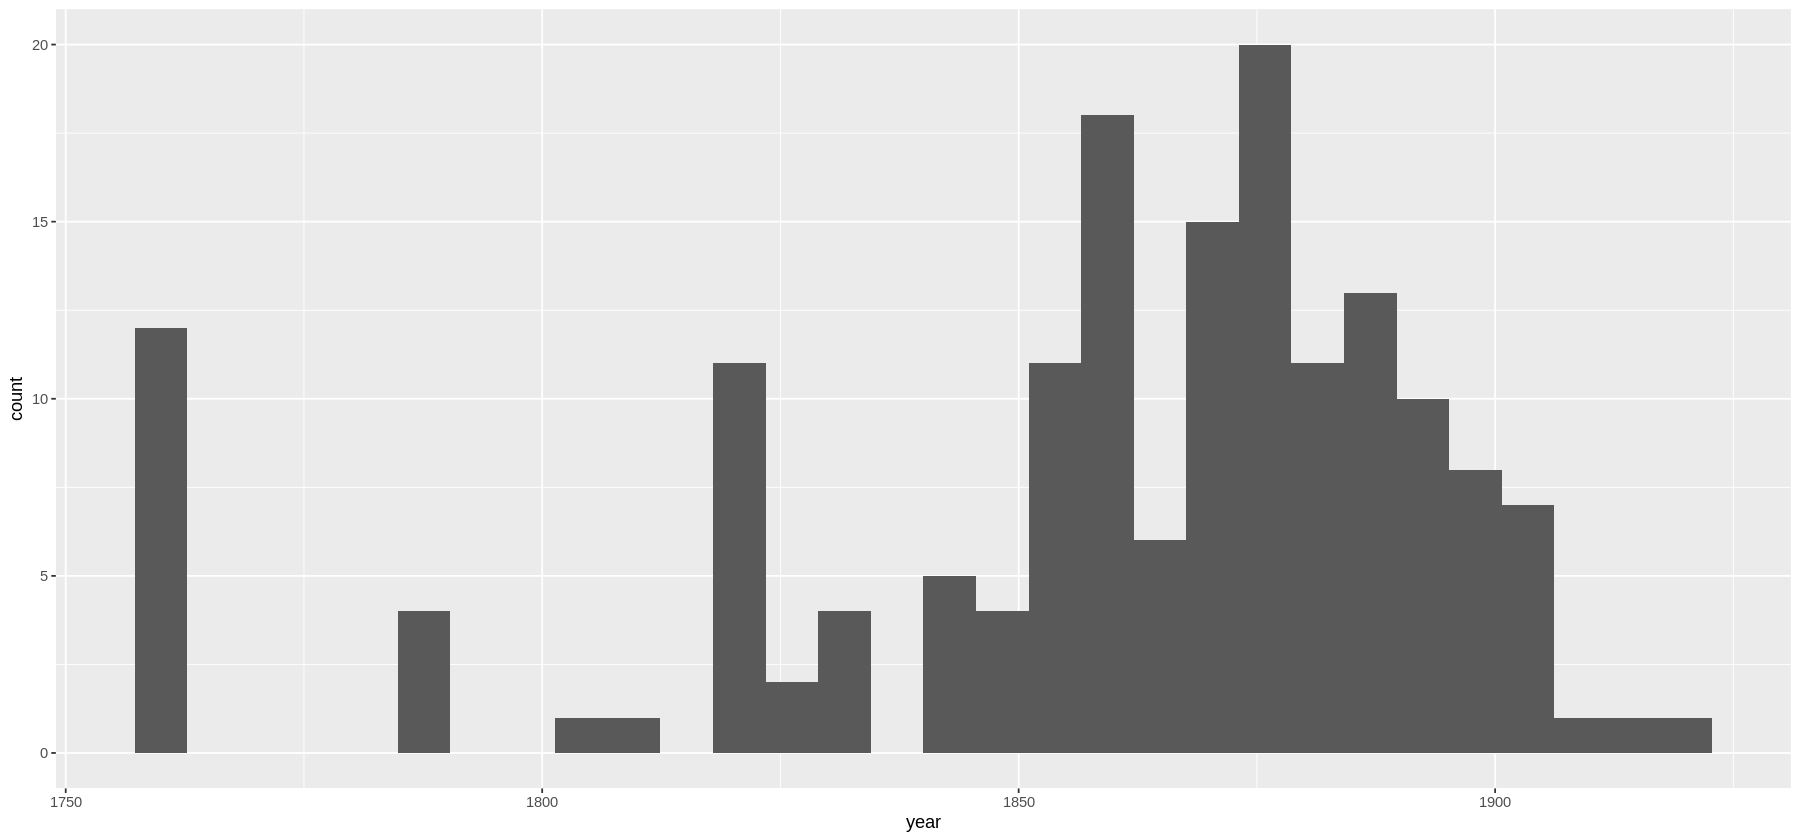

In [145]:
thuc.eds <- meta.cites |> filter(is.edition & work == "urn:cts:greekLit:tlg0003.tlg001")

ggplot(thuc.eds, aes(year)) + geom_histogram()

List the full data for those Thucydides editions.

In [146]:
thuc.eds |> mutate(book=tolower(book)) |> arrange(year)

work,book,hits,is.edition,work.title,words,author,title,year
<chr>,<chr>,<int>,<lgl>,<chr>,<int>,<chr>,<chr>,<int>
urn:cts:greekLit:tlg0003.tlg001,hn5xhj,541,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5xhk,529,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5xhm,556,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5xhp,767,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5xhq,614,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5z6h,613,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5z6i,618,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5z6j,711,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759
urn:cts:greekLit:tlg0003.tlg001,hn5z6k,525,TRUE,"Thucydides, History of the Peloponnesian War",22303,Thucydides.,Bellum Peloponnesiacum,1759


Plot histograms for editions of Thucydides, Herodotus, and Homer.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


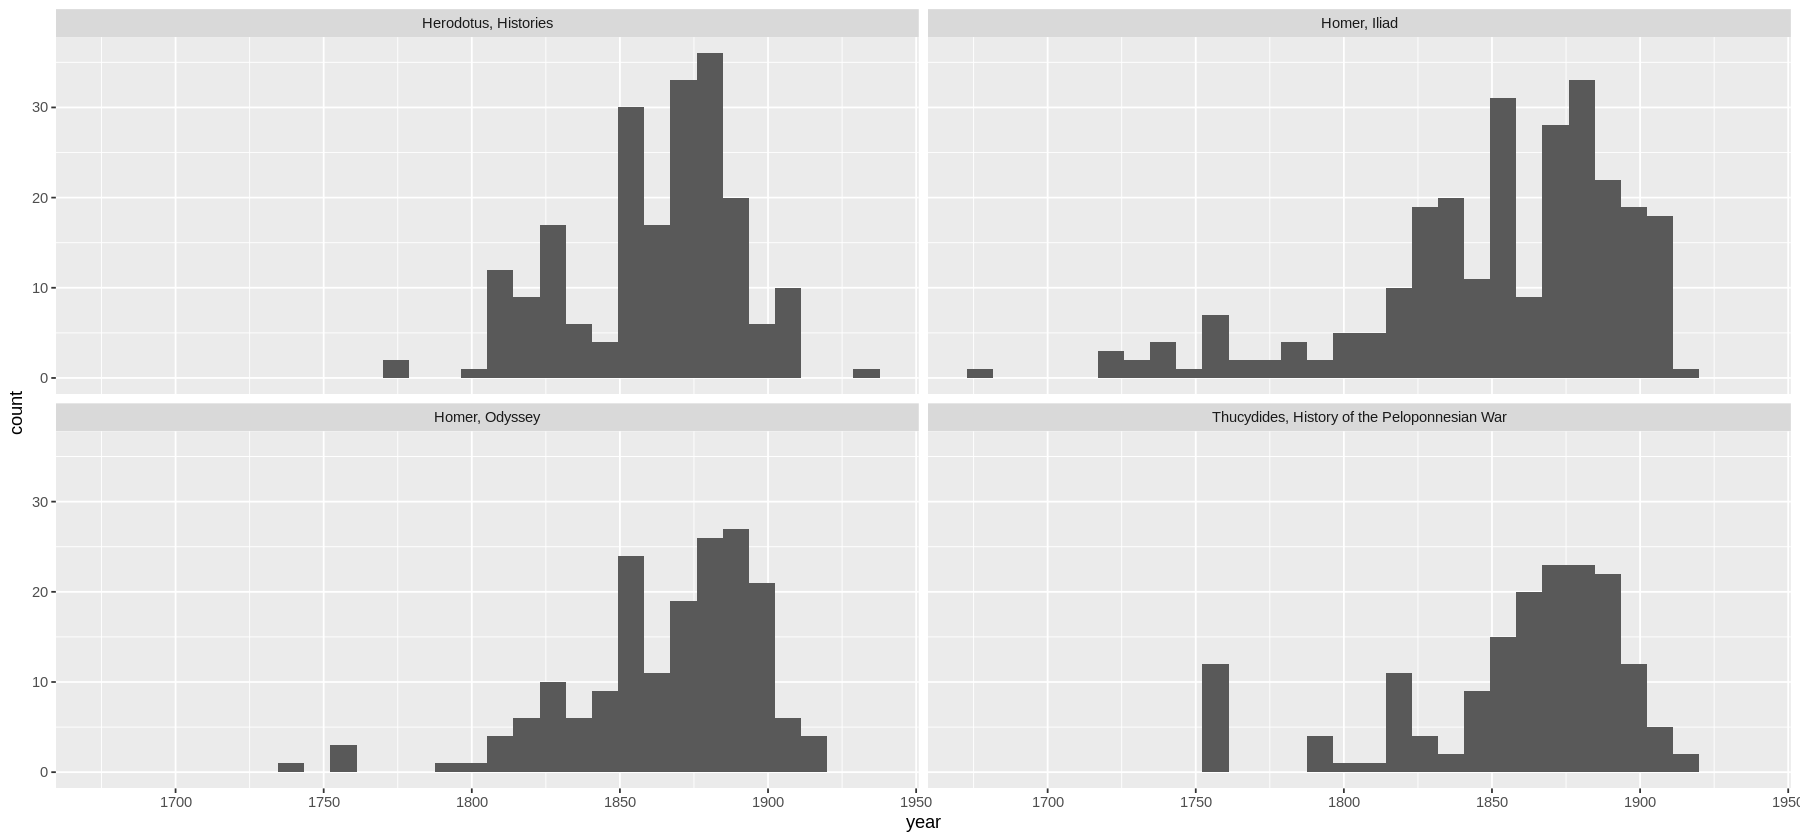

In [168]:
options(repr.plot.width=15)
meta.cites |> filter(is.edition & str_detect(work, "tlg(0003|0016|0012)\\.tlg00[12]")) |>
  ggplot(aes(year)) + geom_histogram() + facet_wrap(vars(work.title))

We now look at the citations of those four works _not_ in books that are editions of those works. They all seem to peak in the later 19c, except for Herodotus, which peaks around 1840.

`summarise()` has grouped output by 'year', 'work'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


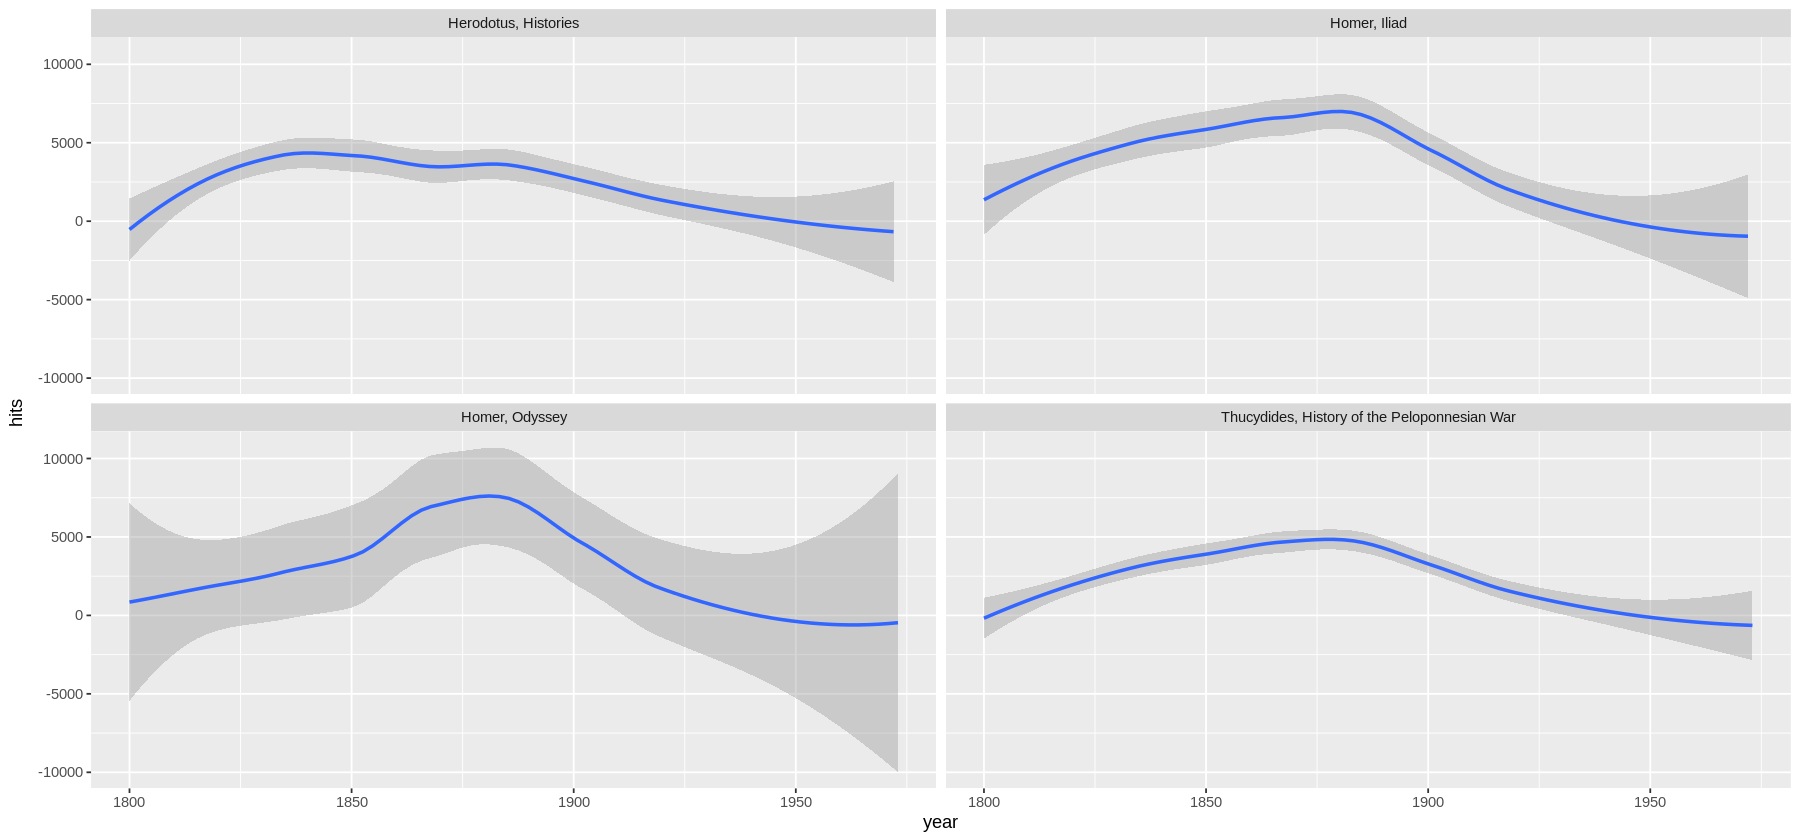

In [165]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.title) |> summarize(hits=sum(hits)) |>
  ggplot(aes(year, hits)) + geom_smooth() + facet_wrap(vars(work.title))

But are we counting citations the right way? There are just a lot more books in the late 19c, before the copyright cliff. (This plot also shows some outliers that we could use to clean up the IDI metadata.)

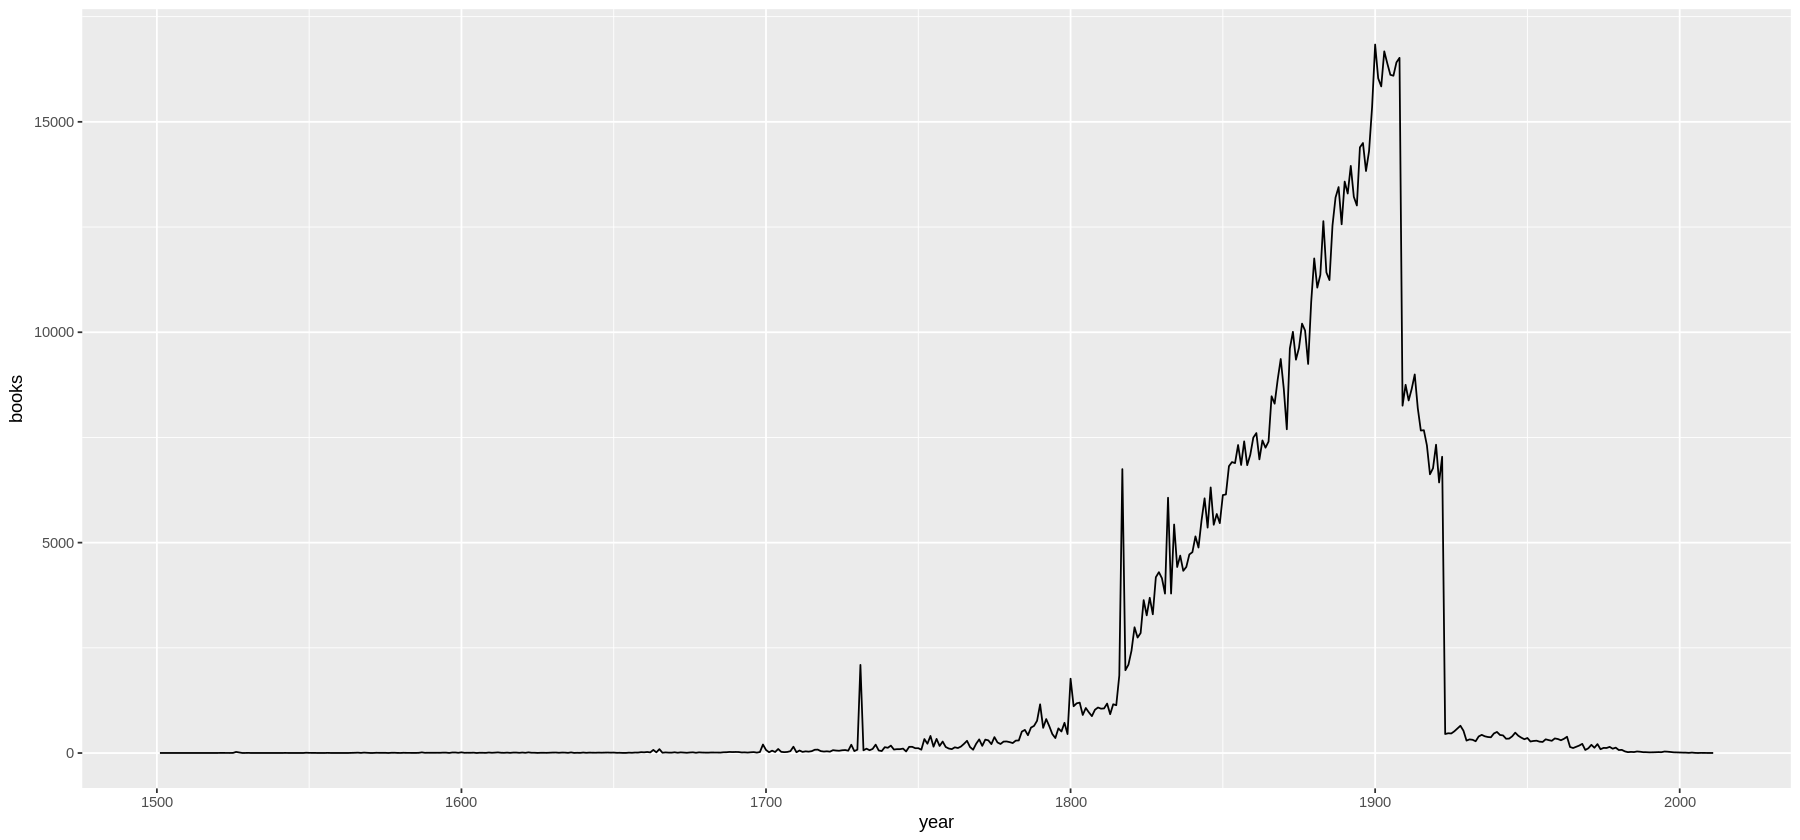

In [174]:
year.books <- idi.dated |> group_by(year) |> summarize(books=n())

year.books |> filter(year >= 1500) |>
  ggplot(aes(year, books)) + geom_line()

If we normalize number of citations by the number of books published in that year, we see that the rates of citation of these works are consistently _falling_ in the later 19c.

`summarise()` has grouped output by 'year', 'work'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


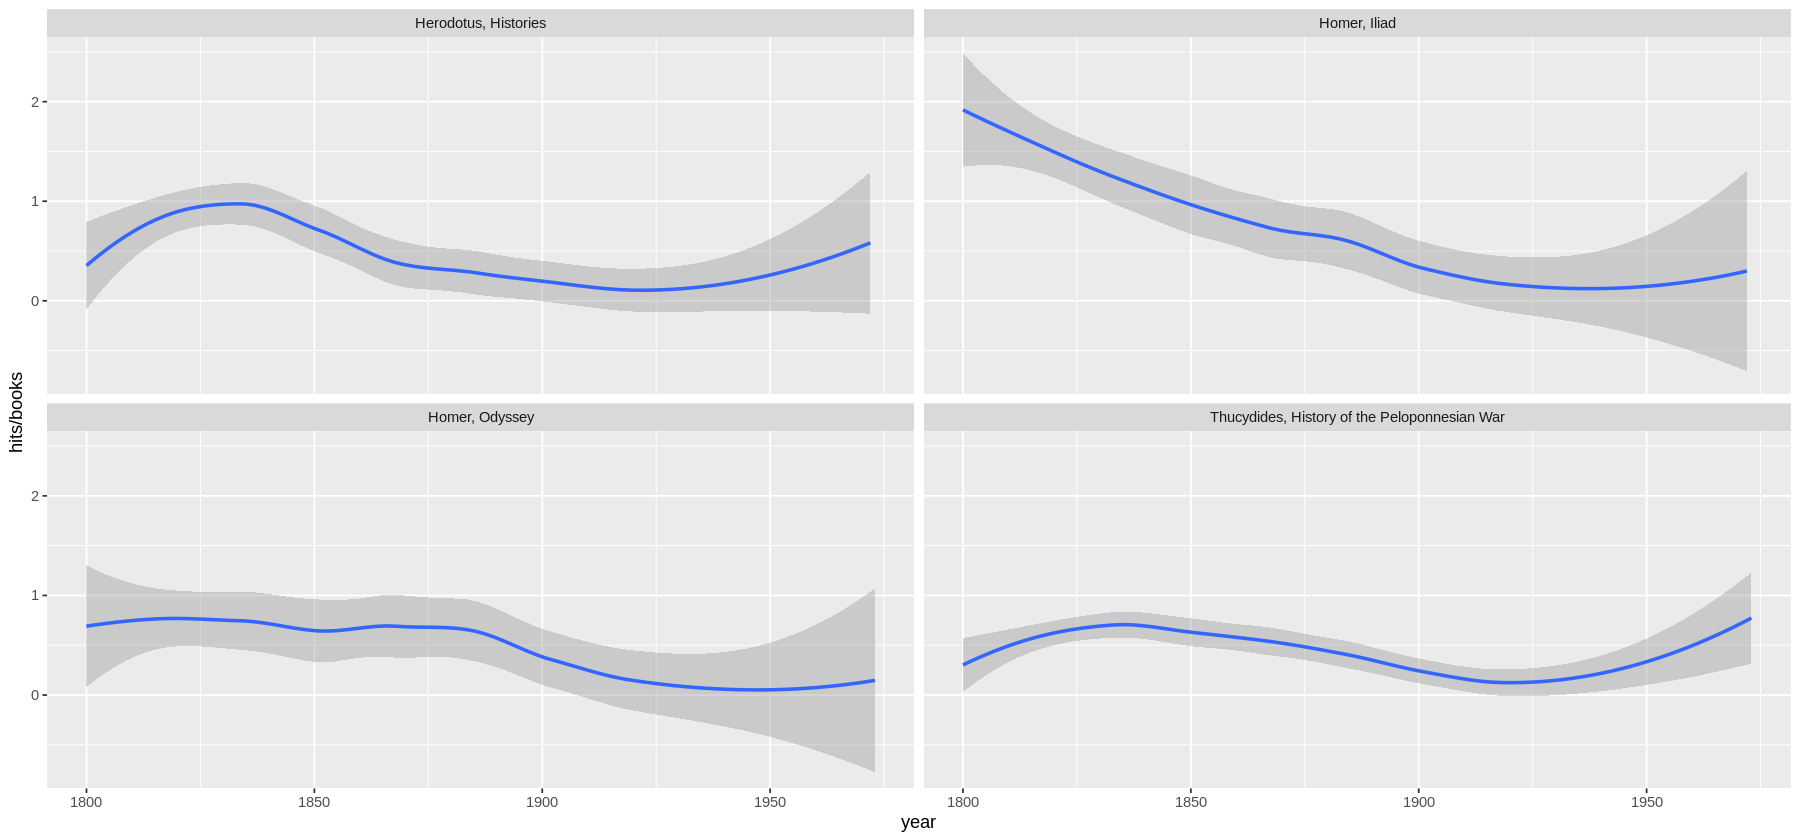

In [173]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.title) |> summarize(hits=sum(hits)) |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth() + facet_wrap(vars(work.title))

But is it really fair to judge the popularity of Homer by the number of _total_ books? Rather than using book-level metadata, or just the top-level LC classifications we get in IDI, what if we used the presence of Greek and Latin quotations as a proxy for "books that might have mentioned Homer"? We plot the books with quotations, including editions, on top of the total number of books.

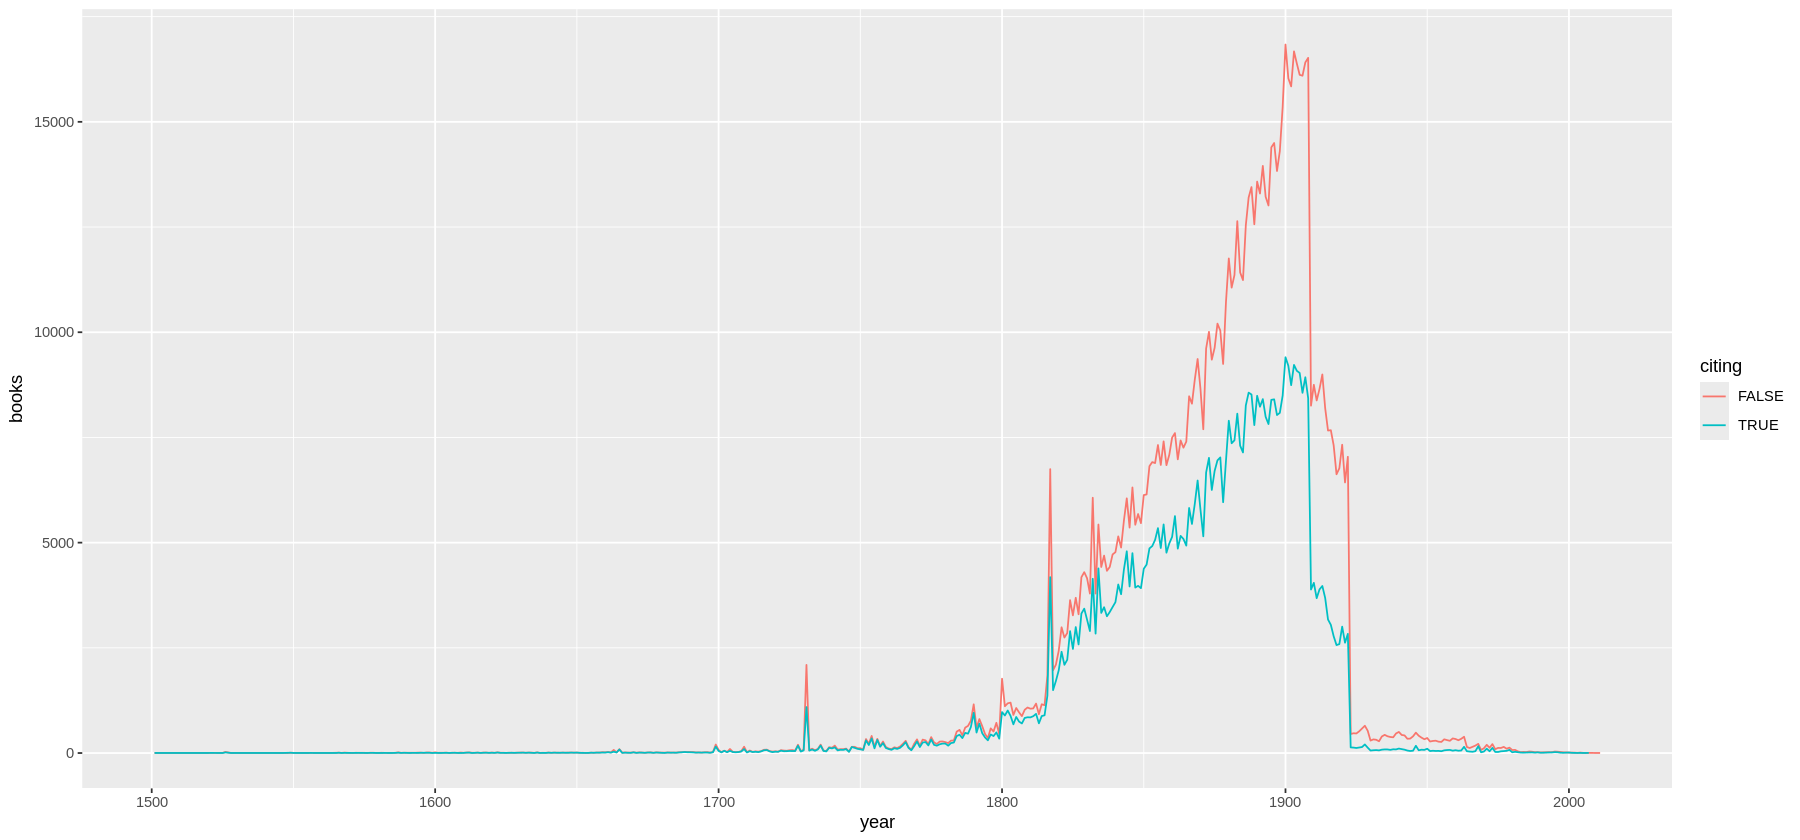

In [176]:
year.cite.books <- meta.cites |> select(year, book) |> distinct() |> group_by(year) |> summarize(books=n())

rbind(year.cite.books %>% mutate(citing=TRUE),
      year.books %>% mutate(citing=FALSE)) |> filter(year >= 1500) |>
  ggplot(aes(year, books, color=citing)) + geom_line()

When we normalize citations by the subset of books, we can see a more decided uptick in interest in Herodotus and Thucydides in the late 19c and early 20c.

`summarise()` has grouped output by 'year', 'work'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


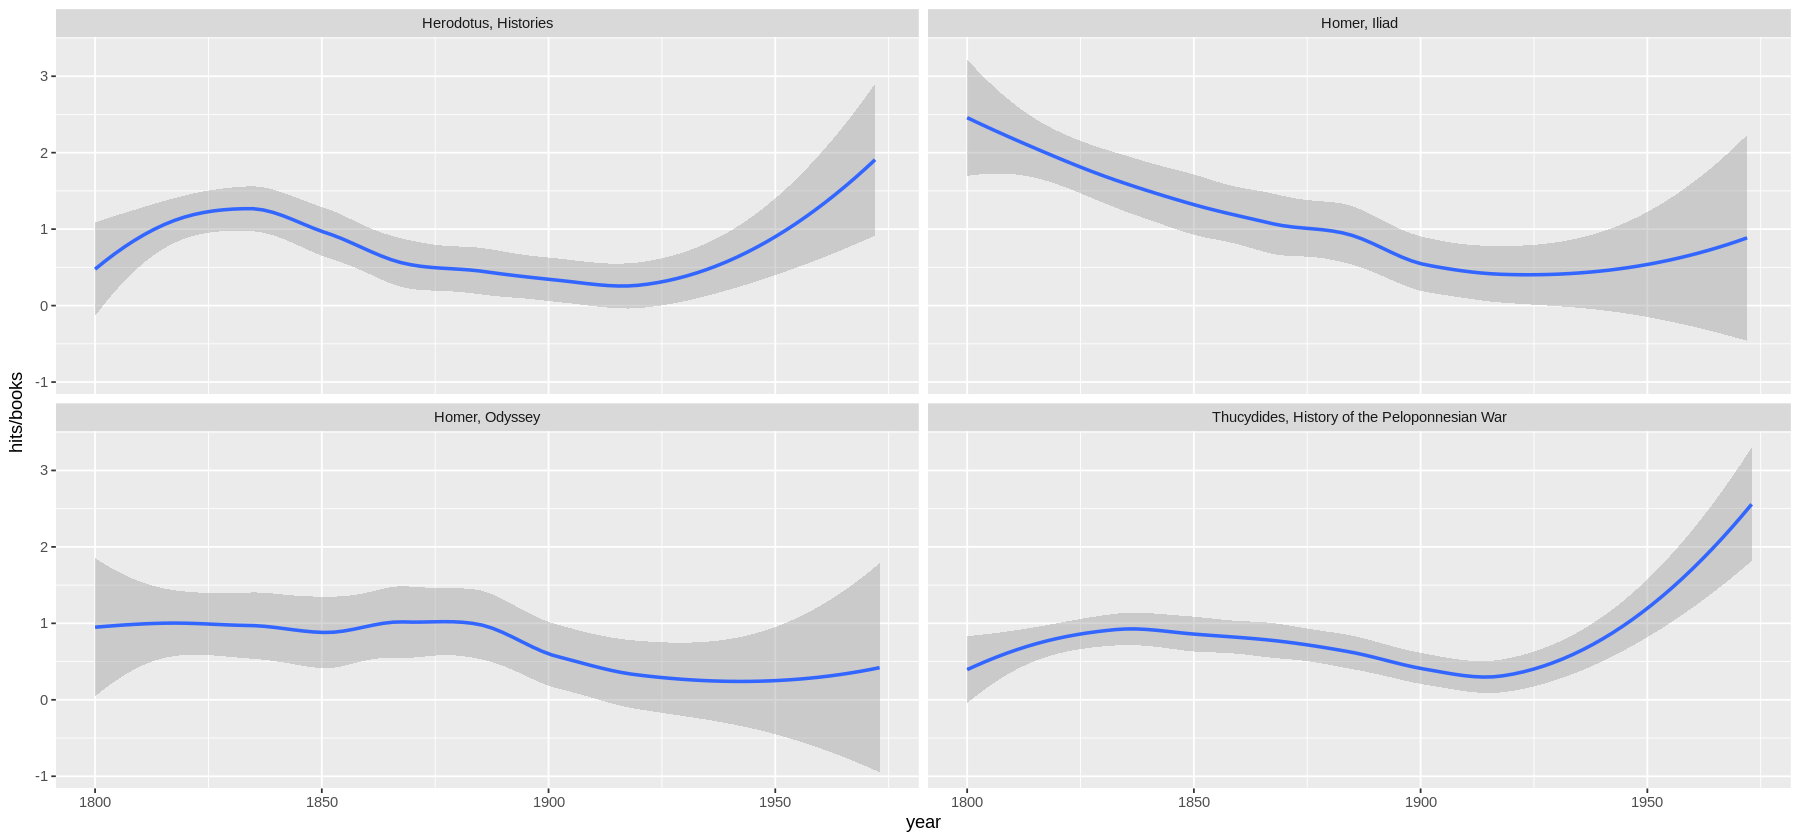

In [167]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.title) |> summarize(hits=sum(hits)) |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth() + facet_wrap(vars(work.title))

If we plot these by the IDI-detected language of these books, we can get a rough idea of the decline of scholarship in Latin.

`summarise()` has grouped output by 'year', 'work', 'work.title'. You can
override using the `.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


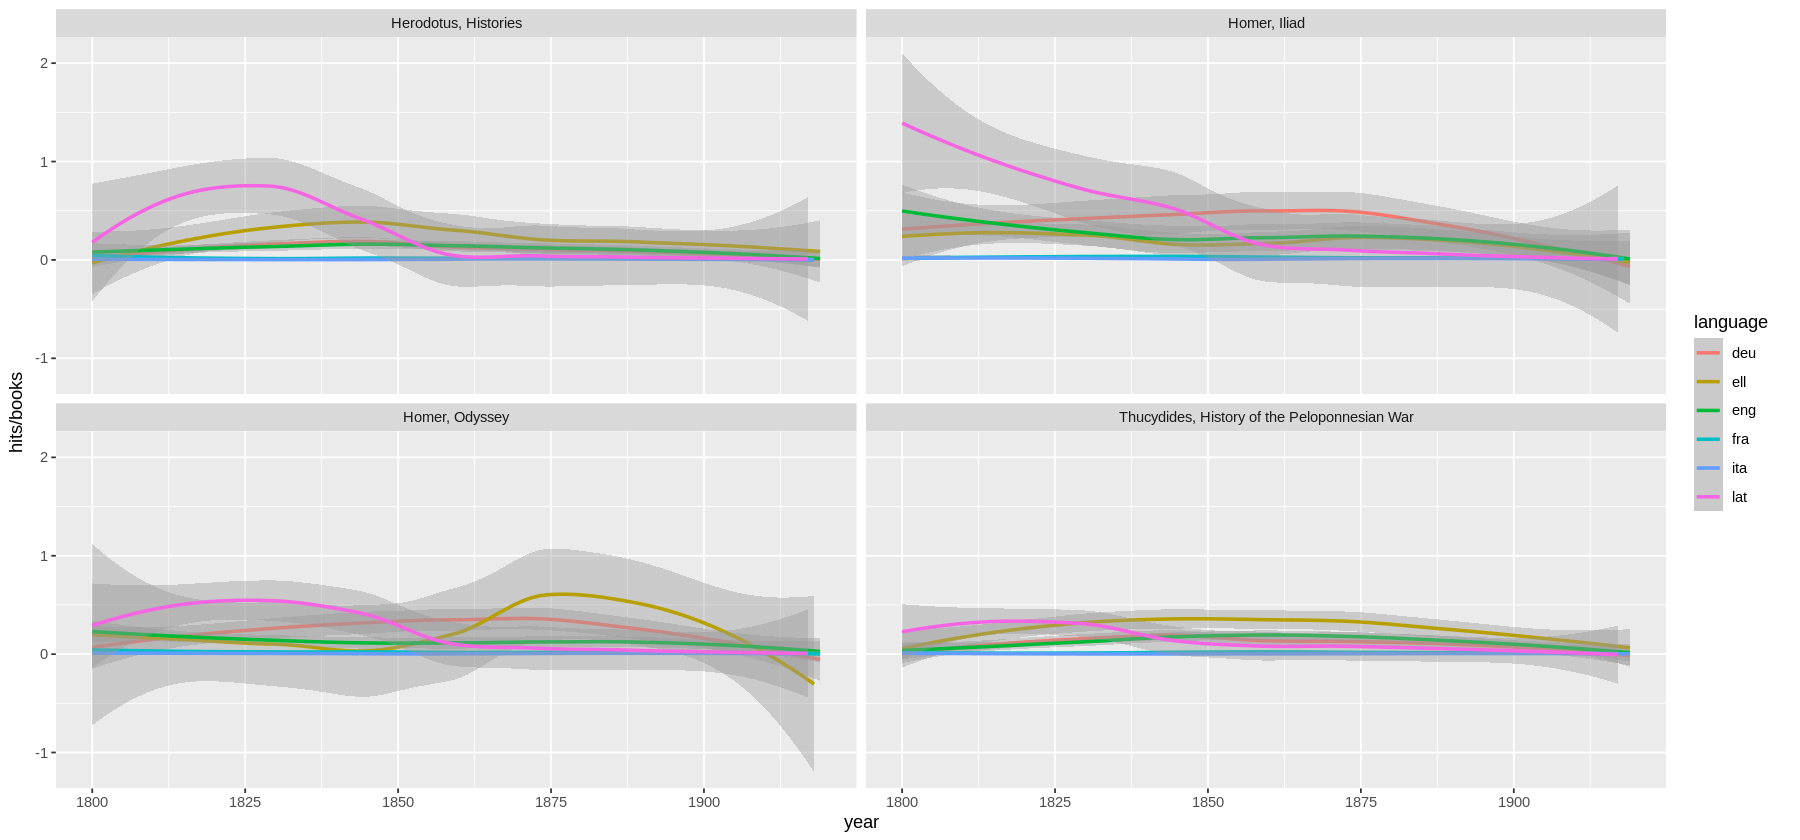

In [184]:
meta.cites |>
  filter(year >= 1800 & year < 1920) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  filter(language %in% alist(ell, lat, deu, eng, fra, ita)) |>
  group_by(year, work, work.title, language) |> summarize(hits=sum(hits)) |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books, color=language)) + geom_smooth() + facet_wrap(vars(work.title))